In [25]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For interactive maps
import plotly.express as px

In [26]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Display the first 5 rows
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [27]:
 # Check column names
print(df.columns.tolist())

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [28]:
# Check the shape of the dataset
print("Shape:", df.shape)

# Check data types
print(df.dtypes)

# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Shape: (429435, 67)
iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object
Missing values per column:
 iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortalit

In [29]:
# Drop rows with missing 'date' or 'location'
df = df.dropna(subset=['date', 'location'])

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Fill missing numeric values with forward fill, then backward fill as fallback
numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(method='ffill').fillna(method='bfill')

C:\Users\HP\AppData\Local\Temp\ipykernel_6508\1331012293.py:11: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [30]:
# Select countries of interest
countries = ['Kenya', 'United States', 'India']
df_countries = df[df['location'].isin(countries)].copy()

# Already converted 'date' above, but let's double-check
df_countries['date'] = pd.to_datetime(df_countries['date'])

# Handle missing values in key columns for selected countries
for col in ['total_cases', 'total_deaths', 'total_vaccinations']:
    if col in df_countries.columns:
        df_countries[col] = df_countries[col].fillna(0)

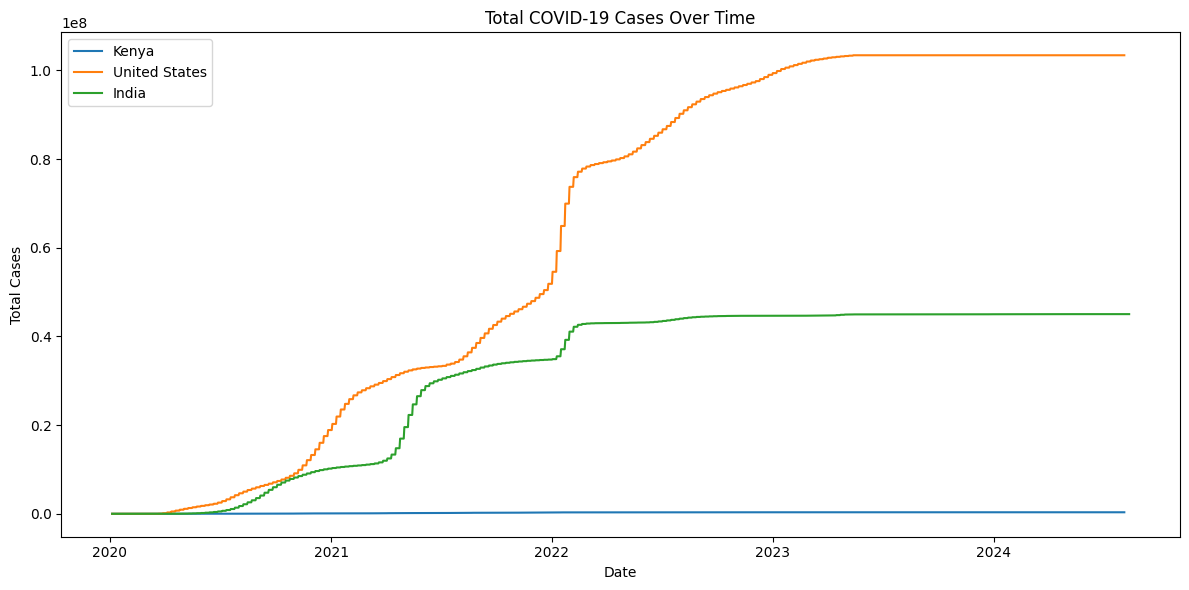

In [31]:
plt.figure(figsize=(12,6))
for country in countries:
    plt.plot(
        df_countries[df_countries['location'] == country]['date'],
        df_countries[df_countries['location'] == country]['total_cases'],
        label=country
    )
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

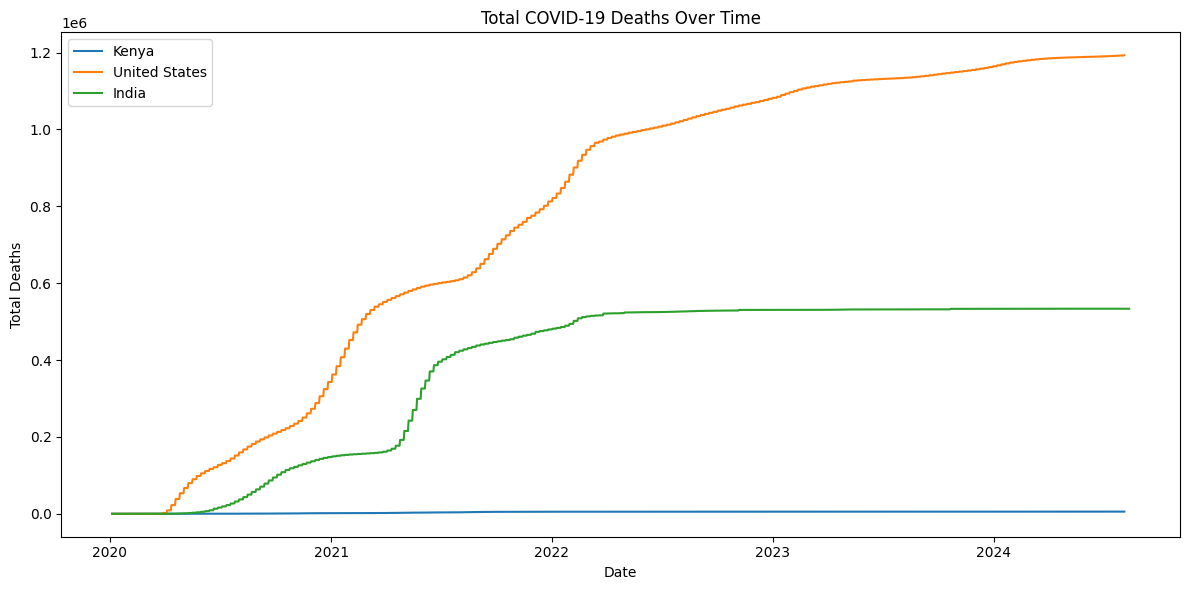

In [32]:
plt.figure(figsize=(12,6))
for country in countries:
    plt.plot(
        df_countries[df_countries['location'] == country]['date'],
        df_countries[df_countries['location'] == country]['total_deaths'],
        label=country
    )
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()

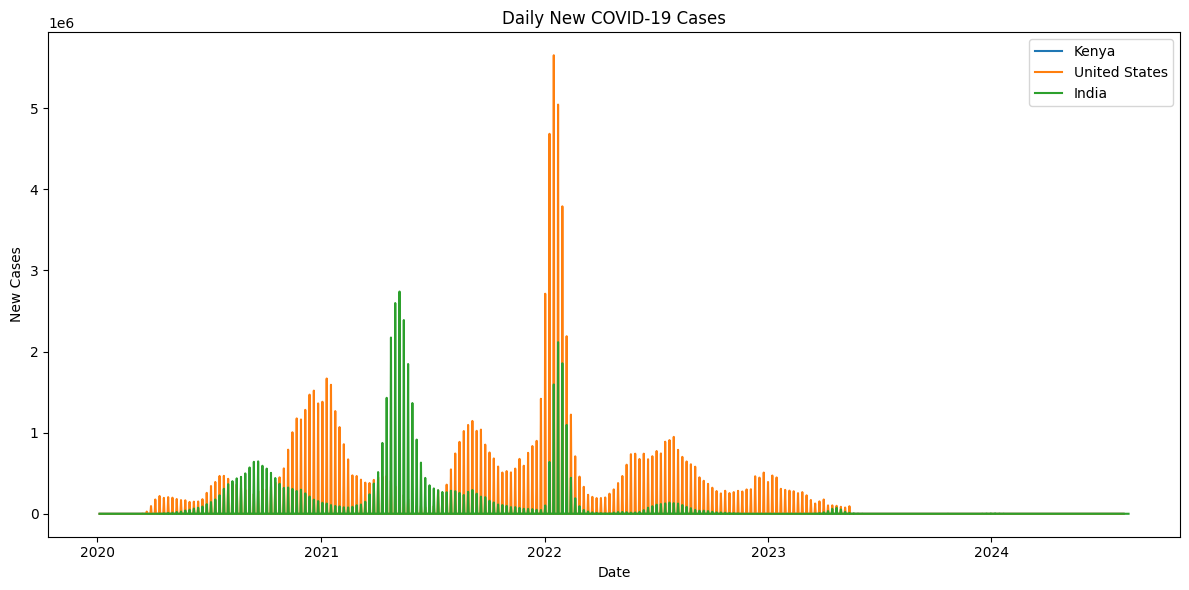

In [33]:
plt.figure(figsize=(12,6))
for country in countries:
    plt.plot(
        df_countries[df_countries['location'] == country]['date'],
        df_countries[df_countries['location'] == country]['new_cases'],
        label=country
    )
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

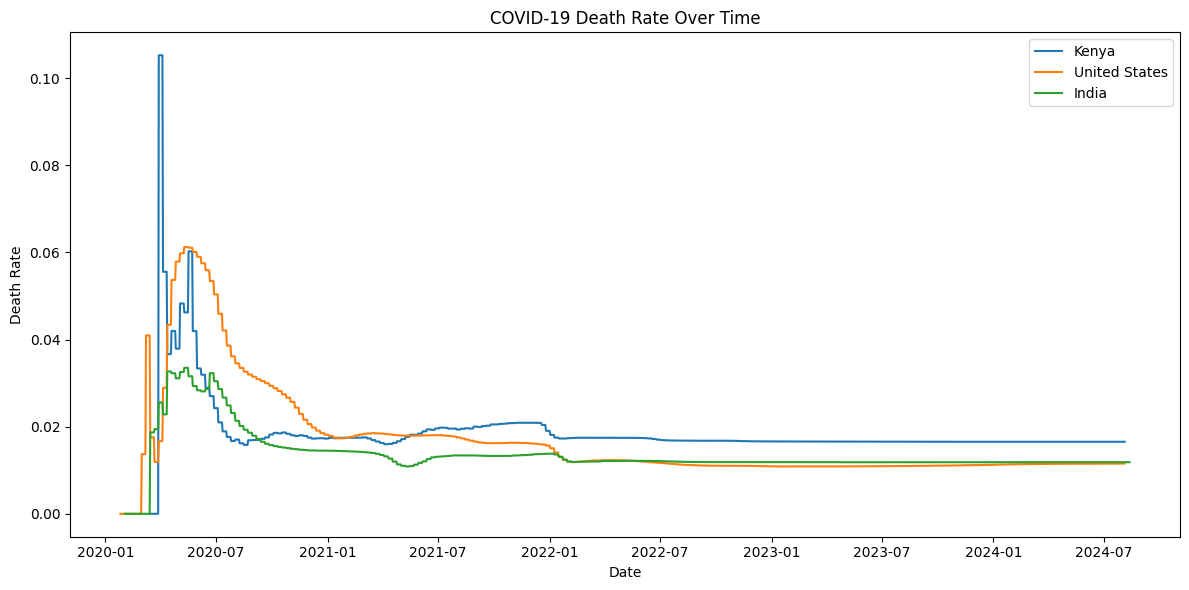

In [34]:
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    death_rate = country_data['total_deaths'] / country_data['total_cases']
    plt.plot(country_data['date'], death_rate, label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6508\259625543.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




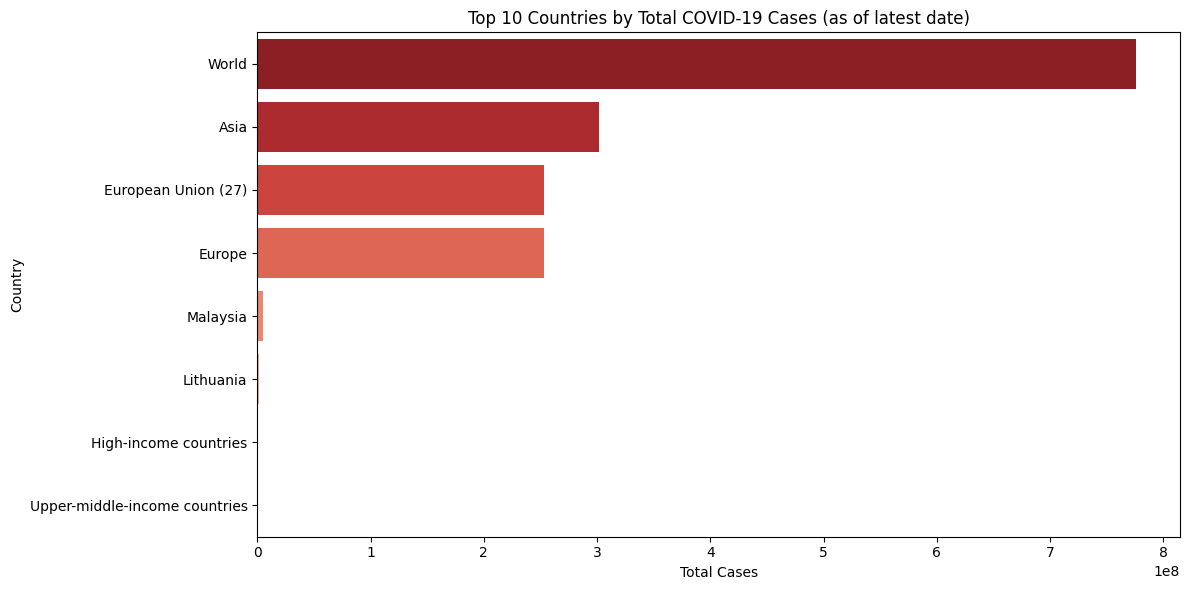

In [35]:
# Get the latest date in the dataset
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]

# Top 10 countries by total cases
top_countries = latest_data.sort_values('total_cases', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_countries,
    x='total_cases',
    y='location',
    palette='Reds_r'
)
plt.title('Top 10 Countries by Total COVID-19 Cases (as of latest date)')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

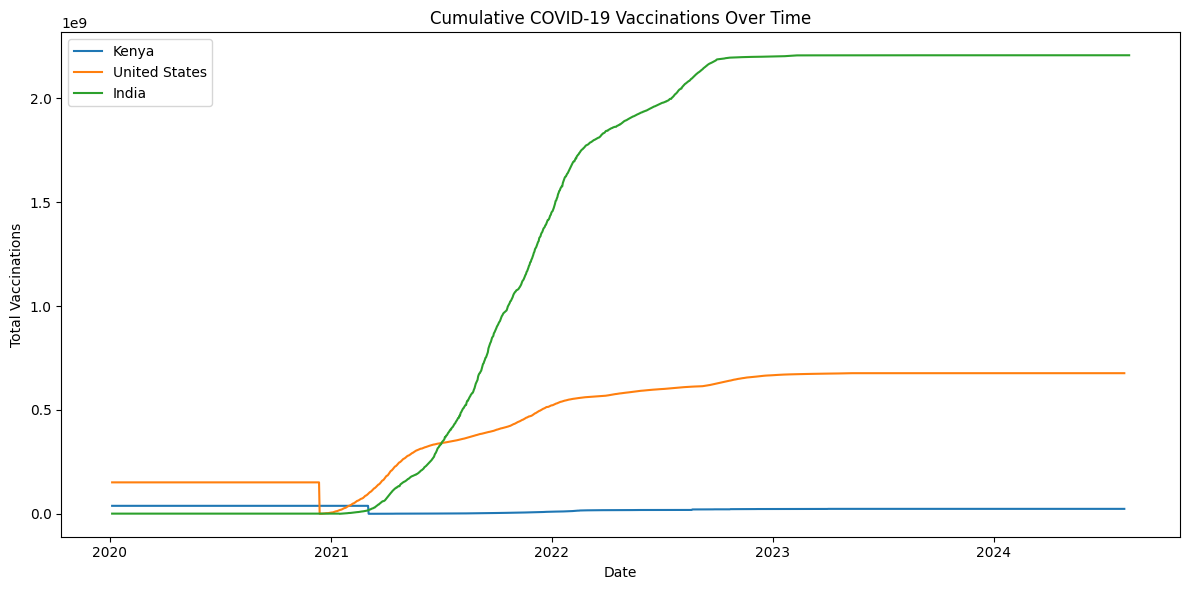

In [36]:
plt.figure(figsize=(12,6))
for country in countries:
    plt.plot(
        df_countries[df_countries['location'] == country]['date'],
        df_countries[df_countries['location'] == country]['total_vaccinations'],
        label=country
    )
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

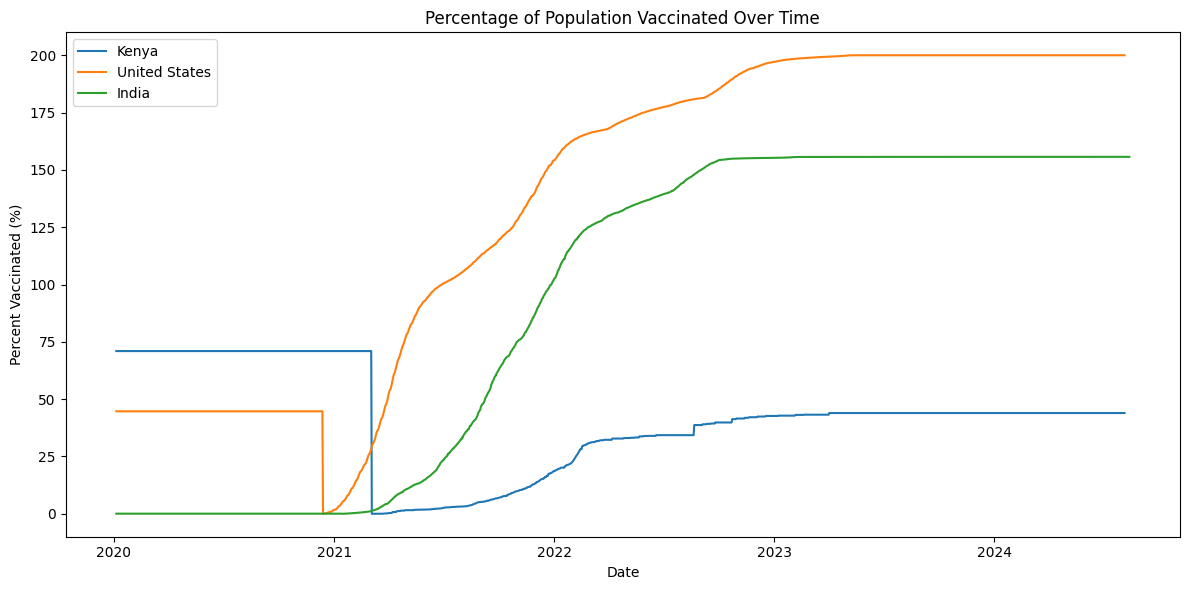

In [37]:
# Check if 'population' column exists
if 'population' in df_countries.columns:
    df_countries['percent_vaccinated'] = (
        df_countries['total_vaccinations'] / df_countries['population'] * 100
    )

    plt.figure(figsize=(12,6))
    for country in countries:
        plt.plot(
            df_countries[df_countries['location'] == country]['date'],
            df_countries[df_countries['location'] == country]['percent_vaccinated'],
            label=country
        )
    plt.title('Percentage of Population Vaccinated Over Time')
    plt.xlabel('Date')
    plt.ylabel('Percent Vaccinated (%)')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Population data not available in the dataset.")

In [38]:
# Prepare data for choropleth map (latest date)
map_data = latest_data[['iso_code', 'location', 'total_cases', 'total_vaccinations']].dropna(subset=['iso_code'])

# Plotly choropleth map for total cases
fig = px.choropleth(
    map_data,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title='Total COVID-19 Cases by Country (as of latest date)'
)
fig.show()